In [884]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")

In [885]:
df = pd.read_excel(r"E:\Machine Learning Project\Diet\BMI_Data.xlsx")

In [886]:
df.isnull().sum()

Date                0
Weight in Pounds    0
BMI                 0
Cholesterol         0
dtype: int64

In [887]:
df.describe()

,Weight in Pounds,BMI,Cholesterol
count,761.000000,761.000000,761.000000
mean,205.539075,86.556922,257.247678
std,17.098299,2.262907,27.467817
min,27.870000,83.716540,0.000000
25%,205.380000,84.979620,248.631520
50%,208.830000,85.875630,264.743919
75%,211.920000,87.566590,272.940000
max,218.360000,98.260000,309.478148


In [888]:
df['Year'] = df['Date'].dt.year

In [889]:
df.head()

,Date,Weight in Pounds,BMI,Cholesterol,Year
0,1993-07-01,201.38,85.35058,251.200000,1993
1,1993-07-02,202.39,85.31267,254.653866,1993
2,1993-07-03,188.84,85.13161,244.942237,1993
3,1993-07-04,184.13,85.16573,236.066544,1993
4,1993-07-05,192.51,85.15533,247.436015,1993


In [890]:
df['Month'] = df['Date'].dt.month

In [891]:
df.groupby('Year')['BMI'].mean()

Year
1993    86.648918
1994    86.659656
1995    86.300200
Name: BMI, dtype: float64

In [892]:
df.groupby('Year')['Weight in Pounds'].mean()

Year
1993    203.536467
1994    205.448427
1995    207.433255
Name: Weight in Pounds, dtype: float64

<Figure size 864x576 with 0 Axes>

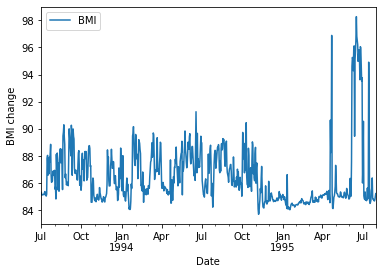

In [893]:
plt.figure(figsize = (12,8))
df.plot(x = 'Date', y = 'BMI', kind = 'line')
plt.ylabel('BMI change')
plt.show()

<Figure size 864x576 with 0 Axes>

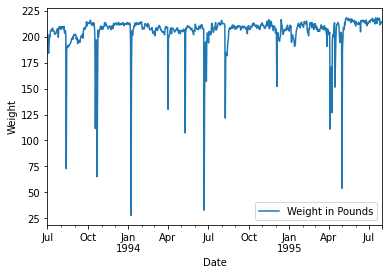

In [894]:
plt.figure(figsize = (12,8))
df.plot(x = 'Date', y = 'Weight in Pounds', kind = 'line')
plt.ylabel('Weight')
plt.show()

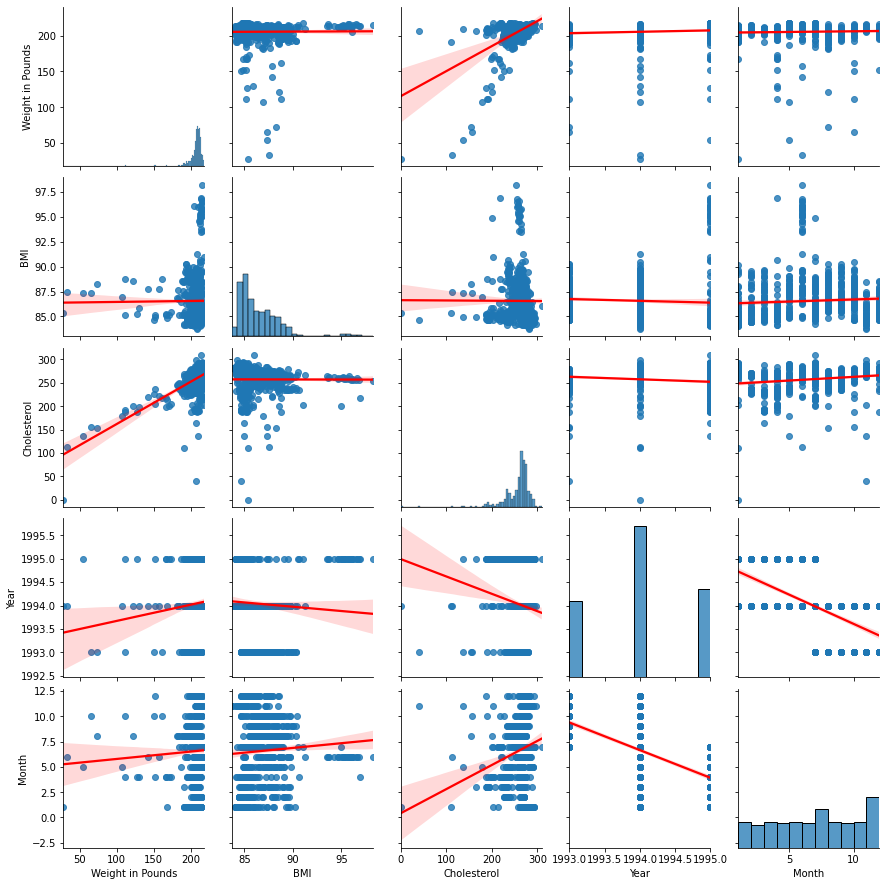

In [895]:
sns.pairplot(df,kind = 'reg', plot_kws={'line_kws':{'color':'red'}})


In [896]:
df.corr()

,Weight in Pounds,BMI,Cholesterol,Year,Month
Weight in Pounds,1.000000,0.007376,0.563185,0.082201,0.036754
BMI,0.007376,1.000000,-0.003473,-0.057551,0.062497
Cholesterol,0.563185,-0.003473,1.000000,-0.141284,0.193356
Year,0.082201,-0.057551,-0.141284,1.000000,-0.582195
Month,0.036754,0.062497,0.193356,-0.582195,1.000000


In [897]:
df['Date'].min()



Timestamp('1993-07-01 00:00:00')

In [898]:
df_y = df[['Date','BMI']]
df_y.set_index('Date', inplace = True)

<AxesSubplot:xlabel='Date'>

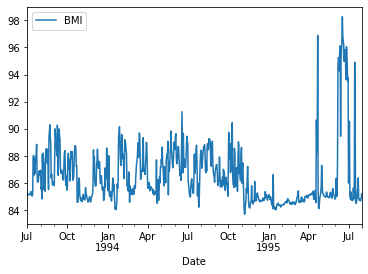

In [899]:
df_y.plot(kind = 'line')
    

In [900]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_y)

(-4.342624606149687,
 0.00037448076522998437,
 6,
 754,
 {'1%': -3.439052522969989,
  '5%': -2.8653808299915013,
  '10%': -2.5688152592363274},
 2382.9128166639234)

In [901]:
feature_df = df[(df['Date']>= '1993-07-01') & (df['Date']<= '1994-07-01')]
feature_df = feature_df[['Date', 'BMI']]

In [902]:
feature_df.rename(columns = {'Date':'ds', 'BMI':'y'}, inplace = True)

In [903]:
feature_df.head()

,ds,y
0,1993-07-01,85.35058
1,1993-07-02,85.31267
2,1993-07-03,85.13161
3,1993-07-04,85.16573
4,1993-07-05,85.15533


In [904]:
px.scatter(df, x = 'Weight in Pounds', y = 'Cholesterol', trendline = 'ols')

In [905]:
px.scatter(df, x = 'BMI', y = 'Cholesterol', trendline = 'ols')

In [906]:
from fbprophet import Prophet
m = Prophet()

In [907]:
m.fit(feature_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [908]:
future = m.make_future_dataframe(periods = 396, freq = 'd')

In [909]:
forecast = m.predict(future)

In [910]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1993-07-01,85.648856,84.049053,87.105544,85.648856,85.648856,0.036132,0.036132,0.036132,0.036132,0.036132,0.036132,0.0,0.0,0.0,85.684988
1,1993-07-02,85.689400,84.180055,87.333586,85.689400,85.689400,0.002485,0.002485,0.002485,0.002485,0.002485,0.002485,0.0,0.0,0.0,85.691885
2,1993-07-03,85.729944,84.153609,87.386690,85.729944,85.729944,0.015947,0.015947,0.015947,0.015947,0.015947,0.015947,0.0,0.0,0.0,85.745891
3,1993-07-04,85.770489,84.137099,87.306502,85.770489,85.770489,-0.071133,-0.071133,-0.071133,-0.071133,-0.071133,-0.071133,0.0,0.0,0.0,85.699355
4,1993-07-05,85.811033,84.261813,87.361970,85.811033,85.811033,-0.053647,-0.053647,-0.053647,-0.053647,-0.053647,-0.053647,0.0,0.0,0.0,85.757386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,1995-07-28,100.177135,84.567566,116.166518,84.973783,116.147574,0.002485,0.002485,0.002485,0.002485,0.002485,0.002485,0.0,0.0,0.0,100.179620
758,1995-07-29,100.206656,84.497462,116.379391,84.923621,116.228912,0.015947,0.015947,0.015947,0.015947,0.015947,0.015947,0.0,0.0,0.0,100.222603
759,1995-07-30,100.236177,84.474475,116.398194,84.873459,116.318332,-0.071133,-0.071133,-0.071133,-0.071133,-0.071133,-0.071133,0.0,0.0,0.0,100.165043
760,1995-07-31,100.265698,84.344512,116.248063,84.833221,116.407967,-0.053647,-0.053647,-0.053647,-0.053647,-0.053647,-0.053647,0.0,0.0,0.0,100.212051


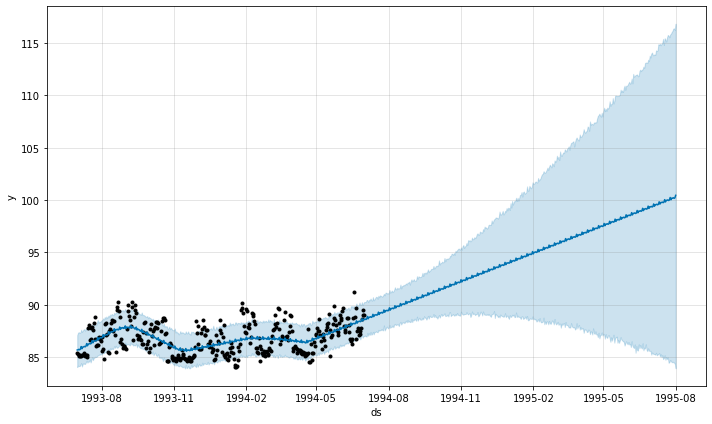

In [911]:
fig1 = m.plot(forecast)

In [912]:
forecast_sub = forecast[['ds', 'yhat']]

In [913]:
test_sub = df[(df['Date']>'1994-07-01') & (df['Date'] <='1995-07-31')]
test_sub = test_sub[['Date', 'BMI']]

In [914]:
test_sub.rename(columns = {'Date':'ds', 'BMI':'y'}, inplace = True)

In [915]:
test_sub[:5]

,ds,y
366,1994-07-02,86.20129
367,1994-07-03,85.78700
368,1994-07-04,85.46870
369,1994-07-05,85.16377
370,1994-07-06,85.25167


In [918]:
eval_df = test_sub.merge(forecast_sub, on = 'ds', how = 'left')
eval_df['abs_error'] = abs(eval_df['y'] - eval_df['yhat'])
eval_df['daily_FA'] = 1 - (eval_df['abs_error']/eval_df['y'])
total_y = sum(eval_df['y'])
total_error = sum(eval_df['abs_error'])
forecast_acc = 1 - (total_error/total_y)
print(forecast_acc)

0.9059050310203589


In [919]:
eval_df['abs_error'] = abs(eval_df['y'] - eval_df['yhat'])
eval_df['daily_FA'] = 1 - (eval_df['abs_error']/eval_df['y'])

In [920]:
total_y = sum(eval_df['y'])
total_error = sum(eval_df['abs_error'])
forecast_acc = 1 - (total_error/total_y)
print(forecast_acc)

0.9059050310203589


In [921]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [922]:
df_cl = df[['Date', 'Cholesterol']]
df_cl.set_index('Date', inplace = True)

In [923]:
adfuller(df_cl)

(-6.551093522389127,
 8.84727076649548e-09,
 3,
 757,
 {'1%': -3.4390179167598367,
  '5%': -2.8653655786032237,
  '10%': -2.5688071343462777},
 6473.774255523991)

In [924]:
forecasted_bmi = forecast['yhat']
forecasted_bmi

0       85.684988
1       85.691885
2       85.745891
3       85.699355
4       85.757386
          ...    
757    100.179620
758    100.222603
759    100.165043
760    100.212051
761    100.454196
Name: yhat, Length: 762, dtype: float64

In [925]:
forecast['yhat'].isnull().sum()

0

In [926]:
input_df = df[['Date','Weight in Pounds', 'BMI', 'Cholesterol']]


In [927]:
def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in input_df.iteritems():
    adfuller_test(column, name=column.name)

 Date : P-Value = 0.0 => Stationary. 
 Weight in Pounds : P-Value = 0.0 => Stationary. 
 BMI : P-Value = 0.0 => Stationary. 
 Cholesterol : P-Value = 0.0 => Stationary. 


In [928]:
pip install hana-ml


Note: you may need to restart the kernel to use updated packages.


In [929]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [930]:
input_df['Year'] = input_df['Date'].dt.year
input_df['Month'] = input_df['Date'].dt.month
input_df[:5]

,Date,Weight in Pounds,BMI,Cholesterol,Year,Month
0,1993-07-01,201.38,85.35058,251.200000,1993,7
1,1993-07-02,202.39,85.31267,254.653866,1993,7
2,1993-07-03,188.84,85.13161,244.942237,1993,7
3,1993-07-04,184.13,85.16573,236.066544,1993,7
4,1993-07-05,192.51,85.15533,247.436015,1993,7


In [931]:
input_df_co = input_df.copy()
input_df_ev = input_df_co.drop('Date', axis = 1)


In [932]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import mse,rmse

In [933]:
nobs = 12
input_df_train, input_df_test = input_df[0:-nobs], input_df[-nobs:]
print(len(input_df_train))


749


In [934]:
input_df_train.drop('Date', axis = 1, inplace = True)

In [935]:
model = VAR(input_df_train)

In [936]:
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  1.68314705278655
BIC :  1.8683370117962215
FPE :  5.382477517289186
HQIC:  1.7545136030736956 

Lag Order = 2
AIC :  1.7004112758976402
BIC :  2.040282206529909
FPE :  5.476257452605123
HQIC:  1.8313953309652717 

Lag Order = 3
AIC :  1.653088460316739
BIC :  2.147965200284971
FPE :  5.223258058025334
HQIC:  1.8438226834279159 

Lag Order = 4
AIC :  1.6591517996933935
BIC :  2.309360313693197
FPE :  5.25524429753279
HQIC:  1.9097693252890884 

Lag Order = 5
AIC :  1.7045003881603353
BIC :  2.5103677732790204
FPE :  5.499420656818949
HQIC:  2.015134824147167 

Lag Order = 6
AIC :  1.6677306514463908
BIC :  2.629585142605546
FPE :  5.30141097103059
HQIC:  2.038516081498437 

Lag Order = 7
AIC :  1.6375100088949393
BIC :  2.7556809843263794
FPE :  5.144309951947863
HQIC:  2.0685809947697282 

Lag Order = 8
AIC :  1.6752282000543204
BIC :  2.950046186809648
FPE :  5.343035220147248
HQIC:  2.166719783923119 

Lag Order = 9
AIC :  1.7073865070818763
BIC :  3.139183186575

In [937]:
result_ = model.fit(7)
result_.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 25, Sep, 2022
Time:                     14:14:19
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    2.75568
Nobs:                     742.000    HQIC:                   2.06858
Log likelihood:          -5691.78    FPE:                    5.14431
AIC:                      1.63751    Det(Omega_mle):         4.05928
--------------------------------------------------------------------
Results for equation Weight in Pounds
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                   -3003.617061      1979.896117           -1.517           0.129
L1.Weight in Pounds         0.209196         0.050810            4.117           0.000
L1.BMI                   

In [938]:
lag_order = results.k_ar
lag_order

10

In [939]:
z = results.forecast(y=input_df_train.values[-lag_order:],steps = 366)
z

array([[ 203.63599569,   84.59984488,  229.31550539, 1995.00269356,
           6.99837479],
       [ 207.62993825,   85.15320016,  232.88603887, 1994.99464329,
           7.10458334],
       [ 218.18372777,   86.02868133,  237.0019831 , 1995.01684071,
           6.88090716],
       ...,
       [ 210.75101599,   85.6820622 ,  246.84656964, 1996.14982698,
           4.03396825],
       [ 210.75782278,   85.68092953,  246.8326727 , 1996.15255002,
           4.03050212],
       [ 210.76462864,   85.67979702,  246.8187775 , 1996.15527269,
           4.02703641]])

In [940]:
test = input_df_co[(input_df_co['Date'] >= '1994-07-01') & (input_df_co['Date'] <= '1995-07-31')]

In [941]:
test.drop('Date', axis = 1, inplace = True)

In [942]:
len(test)

396

In [943]:
idx = pd.date_range(start='1994-07-01',periods=366,freq='d')
df_forecast = pd.DataFrame(z,index=idx,columns=['Cholesterol','BMI', 'Weight in Pounds', 'Year', 'Month'])

In [944]:
df_forecast

,Cholesterol,BMI,Weight in Pounds,Year,Month
1994-07-01,203.635996,84.599845,229.315505,1995.002694,6.998375
1994-07-02,207.629938,85.153200,232.886039,1994.994643,7.104583
1994-07-03,218.183728,86.028681,237.001983,1995.016841,6.880907
1994-07-04,222.890152,86.135631,236.512735,1995.032067,6.693682
1994-07-05,197.178975,86.270310,219.122396,1995.027978,6.808790
...,...,...,...,...,...
1995-06-27,210.737400,85.684328,246.874369,1996.144380,4.040902
1995-06-28,210.744208,85.683195,246.860468,1996.147104,4.037435
1995-06-29,210.751016,85.682062,246.846570,1996.149827,4.033968
1995-06-30,210.757823,85.680930,246.832673,1996.152550,4.030502


In [945]:
input_df[input_df['Date'] >= '1994-07-01']

,Date,Weight in Pounds,BMI,Cholesterol,Year,Month
365,1994-07-01,202.58,88.97786,267.760749,1994,7
366,1994-07-02,194.03,86.20129,262.108152,1994,7
367,1994-07-03,204.88,85.78700,267.372282,1994,7
368,1994-07-04,201.85,85.46870,268.225689,1994,7
369,1994-07-05,202.16,85.16377,266.963293,1994,7
...,...,...,...,...,...,...
756,1995-07-27,212.23,84.72916,213.445089,1995,7
757,1995-07-28,212.65,84.69604,212.924841,1995,7
758,1995-07-29,214.08,84.79000,216.699800,1995,7
759,1995-07-30,213.87,85.01045,214.869370,1995,7


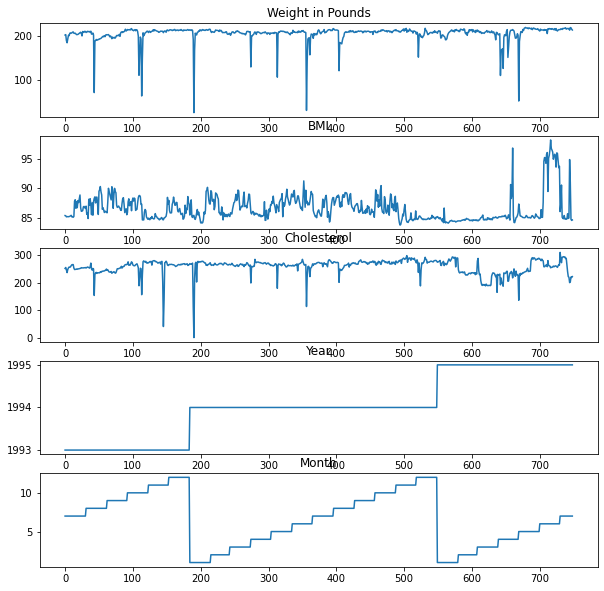

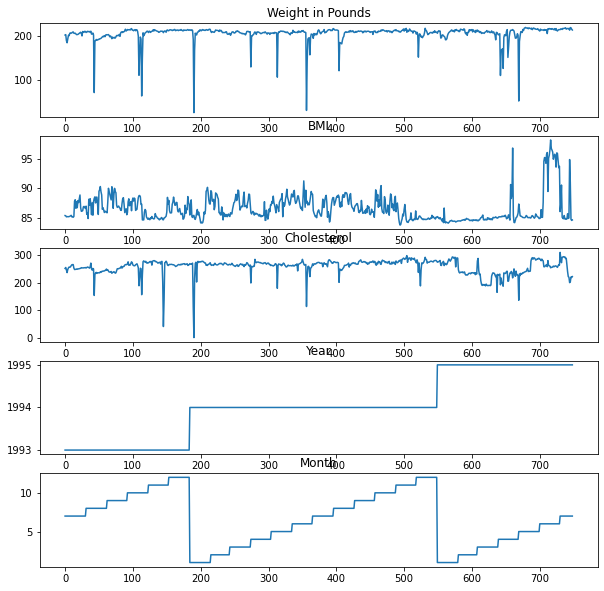

In [946]:
results.plot()

<AxesSubplot:xlabel='Date'>

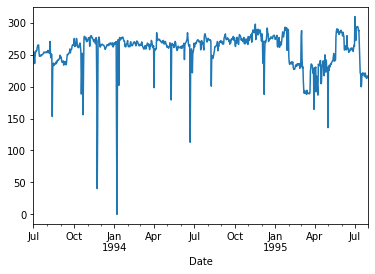

In [947]:
df.set_index('Date')['Cholesterol'].plot(kind = 'line')


In [948]:
df_forecast_ = df_forecast.reset_index()


<AxesSubplot:xlabel='Date'>

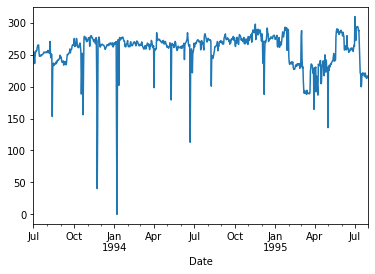

In [949]:
df.set_index('Date')['Cholesterol'].plot(kind = 'line')

<AxesSubplot:>

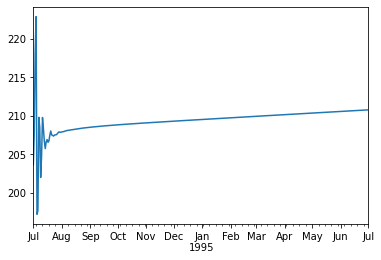

In [950]:
df_forecast['Cholesterol'].plot(kind = 'line')

In [951]:
df_fore_pt = df_forecast.reset_index()
df_fore_pt.rename(columns = {'index': 'Date'}, inplace = True)
df_or = df[(df['Date'] >= '1994-07-01') & (df['Date'] <= '1995-07-01')]

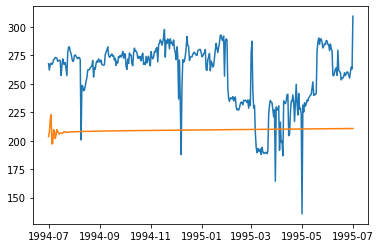

In [952]:
plt.plot(df_or['Date'], df_or['Cholesterol'], label = 'line 1')
plt.plot(df_or['Date'], df_forecast['Cholesterol'], label = 'line 2' )

In [953]:
from sklearn.metrics import mean_squared_error
from math import sqrt



In [954]:
y_true = df[(df['Date']>= '1994-07-01') & (df['Date'] <= '1995-07-01')]['Cholesterol']

In [955]:
rms = sqrt(mean_squared_error(y_true, df_forecast['Cholesterol']))
rms

56.138573334563716

In [956]:
print(len(df_or), len(df_forecast))

366 366


In [957]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [958]:
df_forecast.isnull().sum()

Cholesterol         0
BMI                 0
Weight in Pounds    0
Year                0
Month               0
dtype: int64

In [959]:
df_or.isnull().sum()

Date                0
Weight in Pounds    0
BMI                 0
Cholesterol         0
Year                0
Month               0
dtype: int64

In [960]:
df_forecast.rename(columns = {'Cholesterol': 'Forecasted_Ch'}, inplace = True)

In [961]:
df_fore.rename(columns = {'index': 'Date'}, inplace = True)

In [962]:
eval_df = df_or.merge(df_fore, on = 'Date', how = 'left')
eval_df

,Date,Weight in Pounds_x,BMI_x,Cholesterol_x,Year_x,Month_x,Cholesterol_y,BMI_y,Weight in Pounds_y,Year_y,Month_y
0,1994-07-01,202.58,88.977860,267.760749,1994,7,203.635996,84.599845,229.315505,1995.002694,6.998375
1,1994-07-02,194.03,86.201290,262.108152,1994,7,207.629938,85.153200,232.886039,1994.994643,7.104583
2,1994-07-03,204.88,85.787000,267.372282,1994,7,218.183728,86.028681,237.001983,1995.016841,6.880907
3,1994-07-04,201.85,85.468700,268.225689,1994,7,222.890152,86.135631,236.512735,1995.032067,6.693682
4,1994-07-05,202.16,85.163770,266.963293,1994,7,197.178975,86.270310,219.122396,1995.027978,6.808790
...,...,...,...,...,...,...,...,...,...,...,...
361,1995-06-27,210.47,95.973850,255.113308,1995,6,210.737400,85.684328,246.874369,1996.144380,4.040902
362,1995-06-28,212.28,94.638740,260.472513,1995,6,210.744208,85.683195,246.860468,1996.147104,4.037435
363,1995-06-29,213.66,93.512140,264.743919,1995,6,210.751016,85.682062,246.846570,1996.149827,4.033968
364,1995-06-30,213.48,93.760000,263.023560,1995,6,210.757823,85.680930,246.832673,1996.152550,4.030502


In [963]:
eval_df = df_or.merge(df_fore, on = 'Date', how = 'left')
eval_df['abs_error'] = abs(eval_df['Cholesterol_x'] - eval_df['Cholesterol_y'])
eval_df['daily_FA'] = 1 - (eval_df['abs_error']/eval_df['Cholesterol_x'])
total_y = sum(eval_df['Cholesterol_x'])
total_error = sum(eval_df['abs_error'])
forecast_acc = 1 - (total_error/total_y)
print(forecast_acc)

0.7991669859762145
